## ADR - Decisao entre (ECS - Fargate) ou (EKS com ECS)

### Status

Decidir, para o cenários de Ativos PJ qual o melhor direcionamento para utilização de ECS com Fargate ou de EKS com EC2.
RT: Cliente Itaú
Siglas: AT4, RS4

### Contexto

Foi levantado para discussão da evolução da plataforma a decisão entre ECS e EKS como tecnologia de cluster adequada como "padrão" para uso nas equipes.
Para tal decisão, levantamos os seguintes requisitos para tomada de decisão.

##### Requisitos avaliados

 - Capacidade: Nas capacidades de sigla produto foi extrapolado os seguintes soft limites:
 - - Contratações dia:
 - - Derivado em máximo TPS esperado:
 - - Característica geral da plataforma: Demanda média, sem grandes picos onde é aceitável uma escalabilidade não tão rápida;
 - - Em alguns produtos, é possível notar que algumas APIs são "subutilizadas", ou seja, não apresentam mais que 2 TPS em pico;
 - Governança:
 - - Possibilidade de API Produto e BFF morar no mesmo cluster;
 - - Gestão de acessos associada a facilidade acima; 
 - Rede (Perfomance de conexão entre app na mesma rede);
 - Escalablidade;
 - Portabilidade (Multi Cloud);
 - Preço direto (Sem avaliação de otimização);
 - Segurança;
 - Facilidade de Uso (Preço Indireto);
 - Comunidade Interna;
 - Comunidade Externa;
 - Observabilidade e Addons;

 
### Decisão

Utilizamos os reqsuisitos para montagem de uma matriz de decisão com base nos projetos/times e a pontuação da decisão foi dada conforme avaliações feitas nas agenda de discussão. 

In [11]:
import numpy as np
import pandas as pd

decisao = pd.read_csv('decisao.csv')
decisao

,requisito,ecs_curto_prazo,ecs_longo_prazo,eks_curto_prazo,eks_longo_prazo,observacao
0,Capacidade,8,9,7,8,NaN
1,Comunidade Externa,7,8,7,8,NaN
2,Comunidade Interna,8,10,3,6,NaN
3,Escalablidade,7,7,7,8,NaN
4,Facilidade,8,10,2,6,NaN
5,Governança,5,5,5,5,NaN
6,Observabilidade e Addons,6,7,7,8,NaN
7,Portabilidade,6,7,7,8,NaN
8,Preço,8,6,5,6,NaN
9,Rede,5,6,7,8,NaN


/var/folders/_2/g970t5mj3bs161_ctn9wjq9c0000gn/T/ipykernel_13318/1359033288.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_dots_1 = plt.scatter(X, Y, edgecolor="k", cmap=plt.cm.coolwarm)
/var/folders/_2/g970t5mj3bs161_ctn9wjq9c0000gn/T/ipykernel_13318/1359033288.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter_dots_2 = plt.scatter(Z, W, edgecolor="k", cmap=plt.cm.coolwarm)


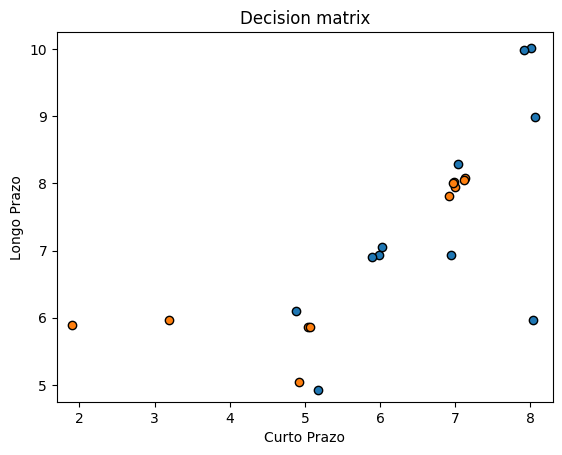

In [27]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 

X = decisao[['ecs_curto_prazo']]
Y = decisao[['ecs_longo_prazo']]

Z = decisao[['eks_curto_prazo']]
W = decisao[['eks_longo_prazo']]

# Plotting the data points    
scatter_dots_1 = plt.scatter(X, Y, edgecolor="k", cmap=plt.cm.coolwarm)
scatter_dots_2 = plt.scatter(Z, W, edgecolor="k", cmap=plt.cm.coolwarm)


xy = scatter_dots_1.get_offsets()
scatter_dots_1.set_offsets(xy + np.random.normal(0, .1, size=xy.shape))
xy = scatter_dots_2.get_offsets()
scatter_dots_2.set_offsets(xy + np.random.normal(0, .1, size=xy.shape))


plt.title(f"Decision matrix")
plt.xlabel('Curto Prazo')
plt.ylabel('Longo Prazo')
plt.show()

##### Interpretação
Podemos notar que o EKS tem um bom equilíbrio como solução para curto e longo prazo, porém possui alguns ofensores a curto prazo que inviabilizam.
O ECS tem mais equilíbrio a médio e longo prazo.

##### Pros
 - Evitaremos maiores dificuldades com EKS, mesmo que no banco existam inictaivas de módulos e templates para geração de EKS, é comum a discussão da dificuldade de implementação e problemas de manutenção do cluster;
 - Experiência dos times com o tipo de projeto ajuda na manutenção e correção de problemas, evitando "erros desconhecidos";
 - Evitar custos, e contas produtos com EKS para um grupo pequeno de APIs pouco utilizadas;
  
### Consequências

 - Menor aderência ao (Multi Cloud), dado que o ECS é uma tecnologia proprietária;
    - Mitigação: Os projetos são desenvolvidos com Docker, sendo assim apenas o Infra As Code está restrito a AWS e não o projeto;
 - Maior latência (Não estimado o quanto maior) entre API produto e BFF, mesmo que ambos estejam fisicamente no mesmo cluster;
 - Segue um caminho um pouco diferente da arquitetura de canais PF/PJ, onde o direcional é utilizar EKS;


 ### Material de apoio